# Building models

The gene expression data will be investigated hoping to find clusters, which are representative for the type of cancer. Further, we can investigate whether there are different patterns for male and females and whether the tumor size has an impact on which genes are expressed.

## Data preparation

## Dimensionality reduction
## Clustering

In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

## Load concatenated dataset

In [2]:
df = pd.read_csv('Clinical_Gene_Exp.csv')

In [3]:
df.head()

,Unnamed: 0,characteristics.tag.histology,source.location,characteristics.tag.gender,characteristics.tag.tumor.size.maximumdiameter,"('AFFX-BioB-3_at',)","('AFFX-BioB-5_at',)","('AFFX-BioB-M_at',)","('AFFX-BioC-3_at',)","('AFFX-BioC-5_at',)",...,"('merck2-Z41436_at',)","('merck2-Z43503_at',)","('merck2-Z47244_x_at',)","('merck2-Z47250_x_at',)","('merck2-Z48501_s_at',)","('merck2-Z48633_s_at',)","('merck2-Z70222_a_at',)","('merck2-Z70608_x_at',)","('merck2-Z72499_a_at',)","('merck2-Z75331_a_at',)"
0,0,"Squamous Cell Carcinoma, NOS",Left Lower Lobe,0,4.0,7.376915,6.984530,7.330576,10.922741,11.032030,...,7.077955,4.350631,7.506299,9.774634,11.295187,10.286077,6.892053,1.777216,9.031084,7.284069
1,1,"Adenocarcinoma, Papillary, NOS",Left Lower Lobe,0,1.3,8.024915,7.427048,8.010530,11.390638,11.533338,...,7.552333,3.578359,5.516440,4.601167,11.443442,11.173715,5.513603,1.940099,9.527973,6.985508
2,2,Non-Small Cell,Left Lower Lobe,0,11.0,7.522543,7.077207,7.334551,10.936703,11.018510,...,5.084856,2.937384,6.310065,6.315107,11.584115,10.586540,6.112918,1.753519,9.515653,6.556233
3,3,"Papillary Type AND Adenocarcinoma, Bronch...",Left Lower Lobe,0,3.5,7.152864,6.849513,7.143286,10.791909,10.875259,...,7.136409,2.904756,5.954062,6.738276,11.240300,10.257621,6.276813,1.889742,9.383670,7.293852
4,4,"Squamous Cell Carcinoma, NOS",Left Lower Lobe,1,7.8,7.211031,6.753131,7.077163,10.701328,10.823792,...,7.667150,3.119091,7.257312,8.118139,10.998377,10.634072,7.041829,1.686633,9.464486,6.244336


## Prepare the data
Extract the features, which shall be used for clustering from the ones, which can be used for colour coding.

In [4]:
labels = df.iloc[:, 1:5]
labels.head()

,characteristics.tag.histology,source.location,characteristics.tag.gender,characteristics.tag.tumor.size.maximumdiameter
0,"Squamous Cell Carcinoma, NOS",Left Lower Lobe,0,4.0
1,"Adenocarcinoma, Papillary, NOS",Left Lower Lobe,0,1.3
2,Non-Small Cell,Left Lower Lobe,0,11.0
3,"Papillary Type AND Adenocarcinoma, Bronch...",Left Lower Lobe,0,3.5
4,"Squamous Cell Carcinoma, NOS",Left Lower Lobe,1,7.8


In [97]:
labels['characteristics.tag.histology'].unique()

array(['Squamous Cell Carcinoma, NOS', 'Adenocarcinoma, Papillary, NOS',
       'Non-Small Cell',
       'Papillary Type AND \xa0\xa0\xa0\xa0 Adenocarcinoma, Bronchiolo-alveolar Features',
       'Adenocarcinoma, NOS', 'Solid Type And Acinar',
       'Adenocarcinoma, Mixed',
       'Adenocarcinoma, Mucinous With Bronchiolo-alveolar Features',
       'Adenocarcinoma, Acinar Type',
       'Squamous Cell Carcinoma, Other (Specify) with adeno features',
       'Adenocarcinoma With Mucinous Features',
       'Adenocarcinoma, Bronchiolo-alveolar Features',
       'Adenocarcinoma With Papillary Features',
       'Carcinoma, Large Cell, Neuroendocrine',
       'Squamous Cell Carcinoma, Other (Specify)endobronchial',
       'Squamous Cell Carcinoma, Papillary',
       'Non-Small Cell, Pleomorphic Type'], dtype=object)

The histological characteristics seem to be overlapping. A distinct separation by the techniques human apply to classify is not achieved. It might be interesting to conduct hierarchical chlustering to see how the relation between histology types is based on the patterns found with clustering algorithm. Furthermore, the location of the tumor, the gender and the diameter of the tumor could play a role in cluster generation and are therefore used for lateron color-coding.

In [58]:
data = df.iloc[:, 5:]
data.head()

,"('AFFX-BioB-3_at',)","('AFFX-BioB-5_at',)","('AFFX-BioB-M_at',)","('AFFX-BioC-3_at',)","('AFFX-BioC-5_at',)","('AFFX-BioDn-3_at',)","('AFFX-BioDn-5_at',)","('AFFX-BkGr-GC03_at',)","('AFFX-BkGr-GC04_at',)","('AFFX-BkGr-GC05_at',)",...,"('merck2-Z41436_at',)","('merck2-Z43503_at',)","('merck2-Z47244_x_at',)","('merck2-Z47250_x_at',)","('merck2-Z48501_s_at',)","('merck2-Z48633_s_at',)","('merck2-Z70222_a_at',)","('merck2-Z70608_x_at',)","('merck2-Z72499_a_at',)","('merck2-Z75331_a_at',)"
0,7.376915,6.984530,7.330576,10.922741,11.032030,13.411168,12.625445,1.464847,1.416673,1.438285,...,7.077955,4.350631,7.506299,9.774634,11.295187,10.286077,6.892053,1.777216,9.031084,7.284069
1,8.024915,7.427048,8.010530,11.390638,11.533338,13.546671,12.898906,1.502126,1.398866,1.403564,...,7.552333,3.578359,5.516440,4.601167,11.443442,11.173715,5.513603,1.940099,9.527973,6.985508
2,7.522543,7.077207,7.334551,10.936703,11.018510,13.360017,12.540647,1.355337,1.343599,1.306212,...,5.084856,2.937384,6.310065,6.315107,11.584115,10.586540,6.112918,1.753519,9.515653,6.556233
3,7.152864,6.849513,7.143286,10.791909,10.875259,13.364171,12.579293,1.327548,1.272961,1.354529,...,7.136409,2.904756,5.954062,6.738276,11.240300,10.257621,6.276813,1.889742,9.383670,7.293852
4,7.211031,6.753131,7.077163,10.701328,10.823792,13.340075,12.420624,1.296788,1.244117,1.291959,...,7.667150,3.119091,7.257312,8.118139,10.998377,10.634072,7.041829,1.686633,9.464486,6.244336


In [32]:
skew_columns = (data.skew().sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

('merck-NC_001526_ORF_1178_at',)    9.014309
('merck-NC_001526_ORF_1180_at',)    8.944469
('merck-NC_001526_ORF_1182_at',)    8.699111
('merck-BX648957_at',)              8.601416
('merck-NC_001526_ORF_1179_at',)    8.505894
                                      ...   
('merck-NM_152539_at',)             0.750148
('merck-ENST00000378906_at',)       0.750100
('merck-AK127029_at',)              0.750061
('merck2-AL713762_at',)             0.750046
('merck2-BE222032_at',)             0.750005
Length: 16116, dtype: float64

In [42]:
to_transform = data[skew_columns.index]
to_transform

,"('merck-NC_001526_ORF_1178_at',)","('merck-NC_001526_ORF_1180_at',)","('merck-NC_001526_ORF_1182_at',)","('merck-BX648957_at',)","('merck-NC_001526_ORF_1179_at',)","('merck-NM_003284_s_at',)","('merck-BC067883_at',)","('merck-AK130854_at',)","('merck-BC045546_at',)","('merck-NM_003008_at',)",...,"('merck2-BG503223_at',)","('merck2-AL831965_x_at',)","('merck2-BC128418_at',)","('merck-XM_379424_at',)","('merck2-CB988589_at',)","('merck-NM_152539_at',)","('merck-ENST00000378906_at',)","('merck-AK127029_at',)","('merck2-AL713762_at',)","('merck2-BE222032_at',)"
0,1.751089,1.923739,1.779409,2.947517,2.166352,3.129840,1.891794,2.212246,1.981491,2.192580,...,1.861109,3.530079,5.139286,2.439108,4.038099,2.375657,4.644862,2.282349,2.654022,3.728412
1,1.734086,2.036465,2.421049,2.638011,2.422869,3.315131,1.806821,2.226301,1.757842,2.527742,...,1.898473,3.235672,5.322348,2.438386,3.593132,3.515497,4.833261,1.982835,2.325837,3.256609
2,1.713741,2.117503,1.900508,3.008557,2.230895,3.585259,1.819067,2.417597,9.596876,2.060241,...,1.750539,3.427685,5.369649,2.443685,3.477359,2.580502,4.828437,1.738827,2.971469,3.756250
3,1.430930,2.036134,1.898905,2.560518,1.945517,3.460781,1.738263,2.041107,1.916549,2.250460,...,1.562808,2.450362,6.435685,2.630789,3.659406,2.521466,4.464399,1.744224,3.935132,3.319397
4,9.513824,10.727684,8.923205,2.747191,9.735626,3.443854,1.602254,2.068401,1.584063,8.464755,...,1.738284,4.933662,5.478771,2.554018,4.622671,2.735747,4.542463,1.875170,3.185894,3.756722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.861992,1.954489,2.087652,2.622204,1.905323,3.090534,1.791824,2.370415,1.704223,2.193021,...,1.805556,3.140600,5.444808,2.663773,3.673200,2.839320,4.273460,1.561808,3.427227,3.794744
85,1.897688,2.309729,1.995183,2.574371,1.835827,3.536945,1.635466,2.035348,1.687369,2.080671,...,1.809376,3.256154,5.569662,2.688792,4.508171,2.395854,4.615754,2.118412,4.893751,3.584508
86,1.731126,2.125028,1.896516,2.508667,2.334790,3.331077,1.538350,2.482759,2.040027,1.778554,...,1.784179,3.208765,4.962811,2.647916,4.053721,2.270624,4.951484,2.011435,3.154695,3.219972
87,1.811532,2.522141,2.028475,3.182315,1.872325,3.034610,1.503894,2.375632,1.726513,2.667143,...,1.748919,5.646401,5.756024,2.322542,4.833163,2.517216,4.896159,1.568157,4.135101,3.748645


In [66]:
not_transform = data[~data.columns.isin(skew_columns)]
not_transform

ValueError: Item wrong length 60607 instead of 89.

As previously seen, the data is strongly shifted to the left side. To shift the data towards normal distribution either log transformation or power transform can be used. Here I am using Yeo-Johnson (default, which allows to handle 0s and negative values) transformation (Power transform from scikit learn). The here conducted approach, standardizes as well to mean = 0 and a unit variance. Transformaion is conducted in place.

In [43]:
from sklearn.preprocessing import power_transform

power_transform(to_transform, method = 'yeo-johnson', copy = False)


C:\Users\chiar\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


array([[ 0.03038148, -1.54681499, -1.83120456, ...,  1.60454794,
        -1.08818059,  0.06213251],
       [-0.0811749 , -0.67534248,  1.65553644, ...,  0.41889106,
        -2.00593658, -1.70170671],
       [-0.22015815, -0.15896177, -0.75523945, ..., -0.98945414,
        -0.33794457,  0.14948761],
       ...,
       [-0.10101654, -0.11500139, -0.78613669, ...,  0.5539392 ,
         0.04543743, -1.86506428],
       [ 0.3956926 ,  1.51647973,  0.10216502, ..., -2.33409513,
         1.65252595,  0.12578364],
       [-0.92815969,  0.68800017, -0.73660548, ...,  0.54180425,
        -0.67854643,  1.00664129]])

In [44]:
to_transform

,"('merck-NC_001526_ORF_1178_at',)","('merck-NC_001526_ORF_1180_at',)","('merck-NC_001526_ORF_1182_at',)","('merck-BX648957_at',)","('merck-NC_001526_ORF_1179_at',)","('merck-NM_003284_s_at',)","('merck-BC067883_at',)","('merck-AK130854_at',)","('merck-BC045546_at',)","('merck-NM_003008_at',)",...,"('merck2-BG503223_at',)","('merck2-AL831965_x_at',)","('merck2-BC128418_at',)","('merck-XM_379424_at',)","('merck2-CB988589_at',)","('merck-NM_152539_at',)","('merck-ENST00000378906_at',)","('merck-AK127029_at',)","('merck2-AL713762_at',)","('merck2-BE222032_at',)"
0,0.030381,-1.546815,-1.831205,1.281970,0.450178,-1.408027,1.053844,-0.169766,1.017636,0.676342,...,1.254614,-0.015842,-1.443560,-1.158345,0.555936,-1.392791,-0.272438,1.604548,-1.088181,0.062133
1,-0.081175,-0.675342,1.655536,0.002492,1.243819,-0.308315,0.726157,-0.088928,0.047040,1.618912,...,1.440834,-0.412405,-0.754943,-1.163520,-0.595960,2.373331,0.387752,0.418891,-2.005937,-1.701707
2,-0.220158,-0.158962,-0.755239,1.460285,0.679632,0.818967,0.776551,0.794405,2.693263,0.118111,...,0.645397,-0.147643,-0.590120,-1.125685,-0.973289,-0.442521,0.372198,-0.989454,-0.337945,0.149488
3,-2.985849,-0.677620,-0.767611,-0.452364,-0.538880,0.356615,0.421995,-1.395387,0.786793,0.880985,...,-0.631961,-1.810515,2.088980,0.054504,-0.396326,-0.699375,-1.021011,-0.952484,1.374020,-1.431750
4,3.636017,3.503463,3.246591,0.539143,3.433328,0.286771,-0.312070,-1.165640,-1.181490,3.135214,...,0.572014,1.323296,-0.228591,-0.395343,1.572380,0.175512,-0.681719,-0.141355,0.107542,0.150957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.667016,-1.289084,0.424359,-0.084846,-0.760770,-1.686949,0.662880,0.609406,-0.275594,0.677983,...,0.959976,-0.552812,-0.338404,0.234691,-0.356170,0.546622,-1.965368,-2.391513,0.559836,0.267684
85,0.842553,0.789553,-0.098091,-0.365951,-1.182171,0.649672,-0.114605,-1.445803,-0.386367,0.213545,...,0.980954,-0.382997,0.053864,0.366470,1.406044,-1.291358,-0.384876,1.014532,2.545262,-0.416232
86,-0.101017,-0.115001,-0.786137,-0.797505,1.004784,-0.227977,-0.730681,1.021305,1.198104,-1.672979,...,0.840557,-0.451485,-2.192890,0.148999,0.589336,-1.951068,0.748968,0.553939,0.045437,-1.865064
87,0.395693,1.516480,0.102165,1.876268,-0.954592,-2.116518,-0.979832,0.630794,-0.136174,1.879004,...,0.635767,1.782442,0.585023,-2.062037,1.845539,-0.718370,0.584580,-2.334095,1.652526,0.125784


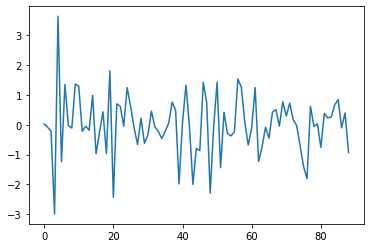

In [47]:
# check distribution
dist1 = to_transform["('merck-NC_001526_ORF_1178_at',)"].plot()

In [54]:
# concatenate the two subsets and standardize
data1 = pd.concat([to_transform, not_transform], axis = 1)
data1.head()

,"('merck-NC_001526_ORF_1178_at',)","('merck-NC_001526_ORF_1180_at',)","('merck-NC_001526_ORF_1182_at',)","('merck-BX648957_at',)","('merck-NC_001526_ORF_1179_at',)","('merck-NM_003284_s_at',)","('merck-BC067883_at',)","('merck-AK130854_at',)","('merck-BC045546_at',)","('merck-NM_003008_at',)",...,"('merck2-Z41436_at',)","('merck2-Z43503_at',)","('merck2-Z47244_x_at',)","('merck2-Z47250_x_at',)","('merck2-Z48501_s_at',)","('merck2-Z48633_s_at',)","('merck2-Z70222_a_at',)","('merck2-Z70608_x_at',)","('merck2-Z72499_a_at',)","('merck2-Z75331_a_at',)"
0,0.030381,-1.546815,-1.831205,1.281970,0.450178,-1.408027,1.053844,-0.169766,1.017636,0.676342,...,7.077955,4.350631,7.506299,9.774634,11.295187,10.286077,6.892053,1.777216,9.031084,7.284069
1,-0.081175,-0.675342,1.655536,0.002492,1.243819,-0.308315,0.726157,-0.088928,0.047040,1.618912,...,7.552333,3.578359,5.516440,4.601167,11.443442,11.173715,5.513603,1.940099,9.527973,6.985508
2,-0.220158,-0.158962,-0.755239,1.460285,0.679632,0.818967,0.776551,0.794405,2.693263,0.118111,...,5.084856,2.937384,6.310065,6.315107,11.584115,10.586540,6.112918,1.753519,9.515653,6.556233
3,-2.985849,-0.677620,-0.767611,-0.452364,-0.538880,0.356615,0.421995,-1.395387,0.786793,0.880985,...,7.136409,2.904756,5.954062,6.738276,11.240300,10.257621,6.276813,1.889742,9.383670,7.293852
4,3.636017,3.503463,3.246591,0.539143,3.433328,0.286771,-0.312070,-1.165640,-1.181490,3.135214,...,7.667150,3.119091,7.257312,8.118139,10.998377,10.634072,7.041829,1.686633,9.464486,6.244336


In [67]:
X = data.values

In [68]:
print(X.shape)
X.dtype

(89, 60607)


dtype('float64')

In [70]:
from sklearn.preprocessing import StandardScaler
# standardize X
X = StandardScaler().fit_transform(X)

## Dimensionality Reduction

Gene expression data is high dimensional, big data. To visualise the data and to form clusters a reduction of the dimensionality is required. The standard procedure seems to be PCA, however this might not necessarily be the optimal choice but just the best known strategy amonst biologists. The gene expression data for this project was acquired using affymetrix microchips. This technology has the following drawbacks:
- only known genes (for which markers are coated to the well) are detected and measured
- we measure intensities, for very high intensities there could be blending out artificats arise for the genes coated to the neighboring area
This two sources of inaccurracy may introduce noise and may impede the analysis. It might decrease the covariances, which affects the PCA outcome as well as decreases the distance in intensity levels of close to each other coated genes. Keeping this in mind, several dimensionality reduction techniques as well as clustering techniques are tested. 

Dimensionality reduction:
- PCA
- Spectral clustering
- Multidmensional scaling

Clustering:
- hierarchical to see whether some histologies have hidden factors in common
- k-means as basic method
- 

In [71]:
## PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'])
principalDf.head()
principalDf.shape

(89, 10)

C:\Users\chiar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

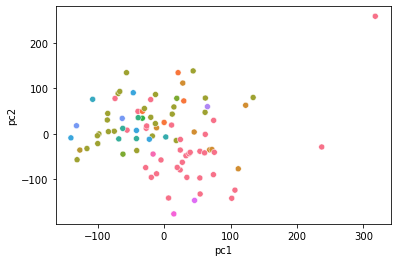

In [72]:
import seaborn as sns
sns.scatterplot(principalDf.pc1, principalDf.pc2, hue = labels['characteristics.tag.histology'], legend = False)

C:\Users\chiar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pc2', ylabel='pc3'>

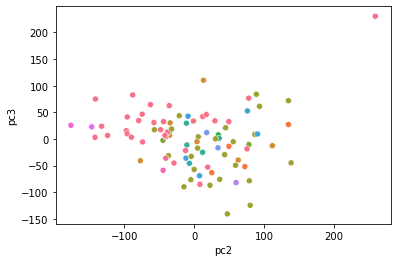

In [73]:
sns.scatterplot(principalDf.pc2, principalDf.pc3, hue = labels['characteristics.tag.histology'], legend = False)

C:\Users\chiar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pc1', ylabel='pc3'>

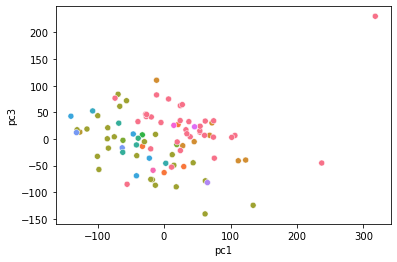

In [74]:
sns.scatterplot(principalDf.pc1, principalDf.pc3, hue = labels['characteristics.tag.histology'], legend = False)

In [ ]:
# no clear separation
# trying to resemble the seurat approach using PCA space to build a graph and 

In [75]:
MDS_reduction = MDS(n_components=10, metric=True, n_init=4, max_iter=300, verbose=0, eps=0.001, n_jobs=None, random_state=42,
dissimilarity='euclidean')

MDS_reduction

### Step 2 - Fit the data and transform it, so we have 2 dimensions instead of 3
X_mds = MDS_reduction.fit_transform(X)
X_mds.shape
X_mds[:,:1].ravel().shape

(89,)

C:\Users\chiar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

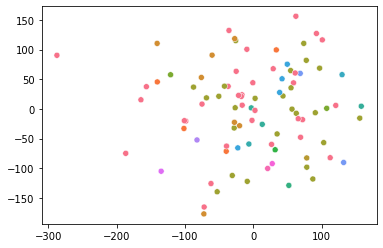

In [76]:
sns.scatterplot(X_mds[:,:1].ravel(), X_mds[:,1:2].ravel(), hue = labels['characteristics.tag.histology'], legend = False)

C:\Users\chiar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

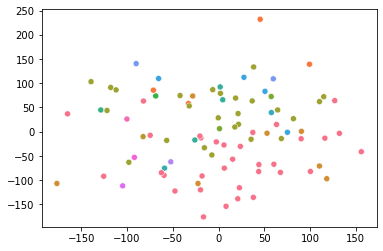

In [77]:
sns.scatterplot(X_mds[:,1:2].ravel(), X_mds[:,2:3].ravel(), hue = labels['characteristics.tag.histology'], legend = False)

C:\Users\chiar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

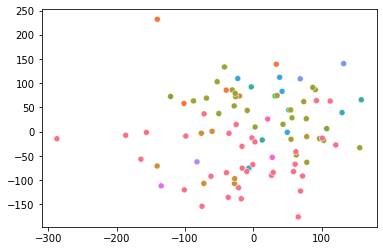

In [78]:
sns.scatterplot(X_mds[:,:1].ravel(), X_mds[:,2:3].ravel(), hue = labels['characteristics.tag.histology'], legend = False)

In [ ]:
# Lets try hierarchical clustering on pca and mds output

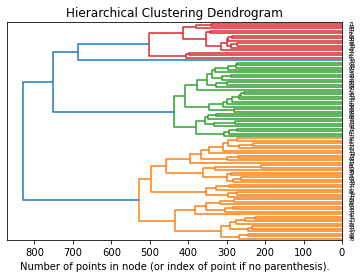

In [79]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, orientation='left', **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=17)#, labels = labels['characteristics.tag.histology'])
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [166]:
model.children_.shape

(88, 2)

In [80]:
#spectral graph partitoning
#let's run SpectalClustering (default affinity rbf - radial basis function)
#see https://en.wikipedia.org/wiki/Radial_basis_function_kernel
from sklearn.cluster import SpectralClustering
m = SpectralClustering(n_clusters=17).fit(X)

C:\Users\chiar\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [81]:
clustering = SpectralClustering(n_clusters=17,
         assign_labels='discretize',
         random_state=0).fit(X)
print(clustering.labels_)
print(clustering)
#SpectralClustering(assign_labels='discretize', n_clusters=17, random_state=0)

[ 5  7  0  3  4 15  6 15 12  6  0  3 13  1  9  2 12  9  8 10  0  4 15  2
  6 15 14 12  3  6 10 13  3  6 11  5 12 14  9  5 16  0  8 11  8 10  7  5
 14  3  8 12  4  7  9  8 15 16 10  8  1  6  3  2  7  8 13  4  1 10  7 15
  6  6  4  3  3 14  2  1 10  8 12 15  6  6 11  0 13]
SpectralClustering(assign_labels='discretize', n_clusters=17, random_state=0)


C:\Users\chiar\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


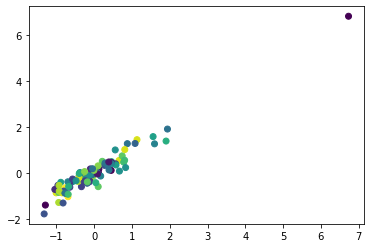

In [82]:
plt.scatter(X[:,0], X[:,1], c=clustering.labels_)

ValueError: 'c' argument has 1 elements, which is inconsistent with 'x' and 'y' with size 5.

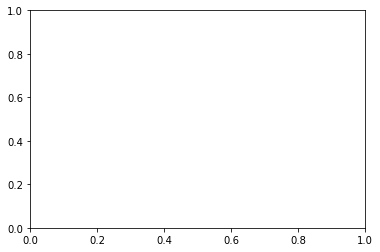

In [83]:
for i in range(17):
    plt.scatter(X[clustering.labels_==i,0],X[clustering.labels_==i,1],c = clustering.labels_[i],alpha = 0.4, s = 10)